**<h1 align="center" > Business Cases with Data Science - Case 1</h1>**


**Group members:**<br> 
Chloé Deschanel - 20240693 <br>
Diogo Carvalho - 20240694 <br>
Ingrid Lopez - 20240692 <br>
Ruben Marques- 20240352

# Introduction

Lisbon, Portugal, has experienced remarkable growth in its tourism and hospitality sector over the past decade. As one of Europe’s most sought-after travel destinations, Lisbon attracts a diverse mix of travelers, including leisure tourists, business professionals, digital nomads, and event attendees. The rise of online booking platforms, changing customer expectations, and an increasing emphasis on personalized experiences has significantly impacted the way hotels operate and strategize their market positioning.

Traditional segmentation methods—often based on distribution channels (e.g., direct, OTA, corporate bookings)—fail to capture the complexity of modern traveler behaviors. The evolving landscape of hospitality requires a more data-driven approach to customer segmentation, allowing hotels to tailor their services, optimize pricing strategies, and improve customer retention.

By leveraging the data provided, we can redefine customer segmentation beyond just how a booking was made. Instead, we can incorporate demographic, behavioral, and spending characteristics to classify customers in a way that aligns with modern hospitality needs, ultimately enhancing revenue management, marketing effectiveness, and guest satisfaction.

# EDA

## 1.1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Set display options to show all columns
pd.set_option('display.max_columns', None)

## 1.2 Loading Data

In [2]:
data = pd.read_csv("../Data/Case1_HotelCustomerSegmentation.csv", sep=";")

In [3]:
# Display a sample of the dataset
data.sample(5)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
101093,101094,AUT,33.0,123,0xA6D740E4FD81011B639E8A15B709A2DF3CB697CBADE4...,0xF8A0A23B8E7C6D5D88572B6F73CD89BEEEA1BBD7658F...,14,648.16,88.0,0,0,1,8,4,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,0
5350,5351,DEU,56.0,1267,0xBBF4EFCE98940CB3B3EA5E03FB47D8F0FFF08E23E661...,0x56BCA7684D57E6BED37F49DAE8020E5DB183E0BDF6EF...,133,216.75,34.0,0,0,1,6,3,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
13979,13980,FRA,45.0,1131,0xDF459563252B9C74B327EEF3B4F79C4BF07339EC8E62...,0xB6B7058CF724FBC02ACBDA2BE09CF7CCFC88F5751C55...,65,274.80,44.5,0,0,1,4,2,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,1,0,0
42354,42355,ESP,32.0,676,0x079922191524E8BE84DD47EAA4736448FF5119AABCCE...,0xFB3FF94CB8A0945A213823C69645216375B4996F070B...,44,735.00,115.0,0,0,1,10,5,Direct,Direct,0,0,0,0,0,0,1,0,0,0,0,0,0
72342,72343,FRA,25.0,397,0x0D7CEFAB0395923888C612E68E0FCF6C5718060D3156...,0x3B104AD0B693E9DE33C9ABBA542433D7A71F0E5A0CDA...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,1


In [4]:
# Set ID as index
data.set_index('ID', inplace=True)

| #   | Column Name        | Description                                                                                       |
|:----|:-------------------|:--------------------------------------------------------------------------------------------------|
| 1   | ID        | Customer ID customer. |
| 2   | Nationality    | Nationality of the customer in ISO 3166-1 (Alpha 3) format. |
| 3   | Age       | Age of the customer. |
| 4   | DaysSinceCreation       | Number of elapsed days since the customer was created. |
| 5   | NameHash | Hash of the customer's name. |
| 6   | DocIDHash | Hash of the customer’s personal document identification number (usually a passport or ID card). |
| 7   | AverageLeadTime | Average number of days before arrival date the customer makes bookings. |
| 8   | LodgingRevenue | Total amount of lodging revenue paid by the customer so far. |
| 9   | OtherRevenue | Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far. |
| 10  | BookingsCanceled | Number of bookings the customer made but subsequently canceled. |
| 11  | BookingsNoShowed | Number of bookings the customer made but subsequently made a "no-show". |
| 12  | BookingsCheckedin | Number of bookings the customer made, which actually ended up staying. |
| 13  | PersonNights | Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adults and Children in each booking, multiplied by the number of Nights (Length-of-stay) of the booking. |
| 14  | RoomNights | Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights (Length-of- stay) of the booking. |
| 15  | DistributionChannel | Distribution channel normally used by the customer to make bookings at the hotel. |
| 16  | MarketSegment | Current market segment of the customer. |
| 17  | SRHighFloor | Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes). |
| 18  | RLowFloor  | Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes).  | 
| 19  | SRAccessibleRoom | Indication if the customer usually asks for an accessible room (0: No, 1: Yes). |
| 20  | SRMediumFloor | Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes). |
| 21  | SRBathtub | Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes). |
| 22  | SRShower | Indication if the customer usually asks for a room with a shower (0: No, 1: Yes). |
| 23  | SRCrib  | Indication if the customer usually asks for a crib (0: No, 1: Yes). |
| 24  | SRKingSizeBed | Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes). |
| 25  | SRTwinBed | Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes). |
| 26  | SRNearElevator | Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes). |
| 27  | SRAwayFromElevator | Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes). |
| 28  | SRNoAlcoholInMiniBar | Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes). |
| 29  | SRQuietRoom | Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes). |


## 1.3 Initial analysis

**Insights:**

- There were 111 duplicated rows that have been removed.
- There are two rows with missing values: Age(4092), DocIDHash(932)
- The categorical columns are: Nationality, NameHash, DocIDHash, DistributionChannel, MarketSegment
- There are 5 categorical columns: Nationality, NameHash, DocIDHash, DistributionChannel, MarketSegment 
- The remaining 23 columns are numerical.

### 1.3.1 Types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   NameHash              111733 non-null  object 
 4   DocIDHash             110732 non-null  object 
 5   AverageLeadTime       111733 non-null  int64  
 6   LodgingRevenue        111733 non-null  float64
 7   OtherRevenue          111733 non-null  float64
 8   BookingsCanceled      111733 non-null  int64  
 9   BookingsNoShowed      111733 non-null  int64  
 10  BookingsCheckedIn     111733 non-null  int64  
 11  PersonsNights         111733 non-null  int64  
 12  RoomNights            111733 non-null  int64  
 13  DistributionChannel   111733 non-null  object 
 14  MarketSegment         111733 non-null  object 
 15  SRHig

### 1.3.2 Duplicates

In [6]:
# Check for duplicates
duplicates = data.duplicated()
print(f"Number of duplicates: {duplicates.sum()}")
data[duplicates].sample(5)

Number of duplicates: 111


,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
95292,NLD,9.0,171,0x539D342E86A03D37E4028D90D161FCADBAAC2FEE2F65...,0xDFB1AE6B32B95A5C37D87A5E8CAF3C78577A32C59D15...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
104299,PRT,NaN,95,0xF1465EC9E2D0027094B7C3D72772A862A635E461FFFC...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
69909,PRT,NaN,414,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
36434,PRT,NaN,766,0x980FA177B3D2F00420A96C437ED2EB8AC43B2037D086...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,4,134.0,8.0,0,0,1,1,1,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0
61565,PRT,NaN,476,0x694F4EE284336ECFAC599F9F187C9F6B71995D48E7D9...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,0,173.0,16.0,0,0,1,2,1,Direct,Direct,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# Drop duplicates
data.drop_duplicates(inplace=True)
print(f'There are {data.duplicated().sum()} duplicates left in the dataset.')

There are 0 duplicates left in the dataset.


### 1.3.3 Missing Values

In [8]:
# Check missing values per columns
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Age          4092
DocIDHash     932
dtype: int64

### 1.3.4 Statistics

In [9]:
# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()
categorical_columns = data.select_dtypes(include='object').columns.tolist()

In [10]:
# print the categorical columns
print(f'There are {len(categorical_columns)} categorical columns: {", ".join(map(str, categorical_columns))}')

There are 5 categorical columns: Nationality, NameHash, DocIDHash, DistributionChannel, MarketSegment


In [11]:
# print the numerical columns
print(f'There are {len(numerical_columns)} numerical columns: {", ".join(map(str, numerical_columns))}')

There are 23 numerical columns: Age, DaysSinceCreation, AverageLeadTime, LodgingRevenue, OtherRevenue, BookingsCanceled, BookingsNoShowed, BookingsCheckedIn, PersonsNights, RoomNights, SRHighFloor, SRLowFloor, SRAccessibleRoom, SRMediumFloor, SRBathtub, SRShower, SRCrib, SRKingSizeBed, SRTwinBed, SRNearElevator, SRAwayFromElevator, SRNoAlcoholInMiniBar, SRQuietRoom


In [12]:
# Summary statistics of numerical data
data[numerical_columns].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,107530.0,45.64,17.24,-10.0,33.0,47.0,58.0,123.00
DaysSinceCreation,111622.0,595.09,374.66,36.0,288.0,522.0,889.0,1385.00
AverageLeadTime,111622.0,60.89,85.14,-1.0,0.0,21.0,95.0,588.00
LodgingRevenue,111622.0,284.10,379.23,0.0,0.0,208.2,393.6,21781.00
OtherRevenue,111622.0,64.74,123.63,0.0,0.0,31.0,84.0,8859.25
BookingsCanceled,111622.0,0.00,0.08,0.0,0.0,0.0,0.0,15.00
BookingsNoShowed,111622.0,0.00,0.03,0.0,0.0,0.0,0.0,3.00
BookingsCheckedIn,111622.0,0.74,0.73,0.0,0.0,1.0,1.0,76.00
PersonsNights,111622.0,4.33,4.63,0.0,0.0,4.0,6.0,116.00
RoomNights,111622.0,2.21,2.30,0.0,0.0,2.0,3.0,185.00


In [13]:
# Summary statistics of categorical data
data[categorical_columns].describe().T

,count,unique,top,freq
Nationality,111622,199,FRA,16507
NameHash,111622,107584,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,43
DocIDHash,110690,103480,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3021
DistributionChannel,111622,4,Travel Agent/Operator,90917
MarketSegment,111622,7,Other,63593


## 1.4 Dataset cleaning

### 1.4.1 Drop MarketSegment

In [14]:
# Check the unique market segments
marketsegments = data['MarketSegment'].unique()
print(f'The {len(marketsegments)} unique market segments are: {", ".join(map(str, marketsegments))}.')

The 7 unique market segments are: Corporate, Travel Agent/Operator, Other, Direct, Complementary, Groups, Aviation.


After getting the initial segments into a list, the MarketSegment feature will be dropped, as we aim to develop a new customer segmentation model. Retaining this feature would not contribute to our analysis.

In [15]:
# Dropping the MarketSegment feature
data.drop('MarketSegment', axis=1, inplace=True)

### 1.4.2 Drop duplicates in DocIDHash

In [16]:
# Check the number of duplicates in DocIDHash
data['DocIDHash'].duplicated().sum()
print(f'There are {data["DocIDHash"].duplicated().sum()} duplicates in the DocIDHash column.')

There are 8141 duplicates in the DocIDHash column.


In [17]:
# Drop features where DocIDHash is duplicated
data.drop_duplicates(subset='DocIDHash',
                     keep='first',
                     inplace=True) # Keep the first occurrence of the duplicated value  

### 1.4.3 Drop features DocIDHash and NameHash

After removing duplicates based on DocIDHash, we will drop both NameHash and DocIDHash, as these are solely identification features and do not contribute to the segmentation.

In [18]:
# Drop columns relative to identification (NameHash, DocIDHash)
data.drop(['NameHash', 'DocIDHash'], axis=1, inplace=True)

### 1.4.4 Create feature TotalRevenue

We will create a new feature, TotalRevenue, to distinguish customers (those who have spent) from registered accounts (those who have not). <br>
This will allow us to filter the dataset accordingly and focus our efforts on the customers.

In [19]:
# Create a feature called TotalRevenue which is the sum of LodgingRevenue and OtherRevenue
data['TotalRevenue'] = data['LodgingRevenue'] + data['OtherRevenue']

In [20]:
# Check how many customers have a TotalRevenue of 0 and how many have bigger than zero
nospendingdata = data[data['TotalRevenue']==0].shape[0]
print(f'There are {nospendingdata} customers with no spending data, which is {nospendingdata/data.shape[0]*100:.2f}% of the dataset.')

There are 31349 customers with no spending data, which is 30.29% of the dataset.


Approximately 30% of the dataset comprises accounts with zero spending. To focus solely on actual customers, we will filter the dataset using TotalRevenue, retaining only accounts that have made transactions at the hotel. This refined dataset will be used for all subsequent analyses.

### 1.4.5 Create dataframe customers

In [21]:
# Create a dataframe with only customers who have spent
customers = data[data['TotalRevenue']>0]

In [22]:
# Separate numerical and categorical columns
customers_numerical = customers.select_dtypes(exclude = 'object')
customers_categorical = customers.select_dtypes(include='object')

In [23]:
customers_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,71914.0,48.039853,15.306212,-10.0,36.000,48.00,59.0,115.00
DaysSinceCreation,72132.0,687.123205,375.326269,36.0,376.000,709.00,1005.0,1385.00
AverageLeadTime,72132.0,89.341374,90.277544,-1.0,19.000,61.00,136.0,588.00
LodgingRevenue,72132.0,413.594993,396.424439,0.0,196.200,317.50,492.0,21781.00
OtherRevenue,72132.0,94.212131,138.821250,0.0,28.000,60.50,116.0,8859.25
BookingsCanceled,72132.0,0.001733,0.078526,0.0,0.000,0.00,0.0,15.00
BookingsNoShowed,72132.0,0.000416,0.022336,0.0,0.000,0.00,0.0,2.00
BookingsCheckedIn,72132.0,1.037293,0.587137,1.0,1.000,1.00,1.0,76.00
PersonsNights,72132.0,6.325556,4.372742,0.0,3.000,6.00,8.0,116.00
RoomNights,72132.0,3.188294,2.088139,1.0,2.000,3.00,4.0,185.00


In [24]:
customers_categorical.describe().T

,count,unique,top,freq
Nationality,72132,185,FRA,11228
DistributionChannel,72132,4,Travel Agent/Operator,60193


## Age
`Age:` <br>
Has missing values; <br>
Average age is 45 years; <br>
Min is -10; <br>
Max is 115.

Actionables: Deal with missing values, plot age distribution, check cases where age is negative, check cases where age is above 100. <br>


**TO DO: Create bins with age segments.**

Age wil be feature 1 of demographic clustering and there will be three groups:
- Minors: under 18;
- Young: 18-40;
- Old: <40

In [25]:
# Check number of missing values in age
customers['Age'].isnull().sum()
print(f'There are {customers["Age"].isnull().sum()} missing values in the Age column, which correspond to {customers["Age"].isnull().sum()/len(customers)*100:.2f}% of the data.')

There are 218 missing values in the Age column, which correspond to 0.30% of the data.


In [26]:
# Check age correlation with other columns 
customers.select_dtypes(include=[np.number]).corr()['Age'].sort_values(ascending=False)

Age                     1.000000
AverageLeadTime         0.251928
OtherRevenue            0.065292
DaysSinceCreation       0.054238
SRTwinBed               0.046665
SRLowFloor              0.015800
SRNearElevator          0.013889
SRQuietRoom             0.012411
BookingsCheckedIn       0.011285
SRAwayFromElevator      0.008628
BookingsCanceled        0.007127
SRMediumFloor           0.007038
SRShower                0.006936
BookingsNoShowed        0.006913
SRAccessibleRoom        0.002658
RoomNights              0.001424
SRNoAlcoholInMiniBar   -0.006426
PersonsNights          -0.019733
SRBathtub              -0.021258
SRKingSizeBed          -0.024277
SRHighFloor            -0.025744
TotalRevenue           -0.042690
SRCrib                 -0.072649
LodgingRevenue         -0.074331
Name: Age, dtype: float64

Our goal by checking this correlation was to see if any variable was correlated with age enough, that we could use in a predictive model to predict age. Since the highest correlated variable is 26% correlation, we discarded this idea, and just assumed to input median.

In [27]:
# Check cases where age is negative
print(f'There are {len(customers[customers['Age'] < 0])} cases where age is negative')
customers[customers['Age'] < 0]

There are 12 cases where age is negative


,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
5128,FRA,-8.0,1271,66,93.30,14.00,0,0,1,2,1,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,107.30
6752,GBR,-10.0,1243,22,450.00,18.00,0,0,1,1,1,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,468.00
8361,DEU,-6.0,1217,256,126.00,109.00,0,0,1,4,2,Travel Agent/Operator,0,0,0,0,0,0,0,0,1,0,0,0,0,235.00
8629,NLD,-9.0,1213,111,414.60,34.00,0,0,1,4,4,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,448.60
9920,DZA,-5.0,1193,54,138.93,29.50,0,0,1,4,1,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,168.43
10663,DEU,-9.0,1181,292,126.00,113.00,0,0,1,4,2,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,239.00
10695,DEU,-9.0,1181,292,128.00,57.50,0,0,1,2,2,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,185.50
10756,PRT,-5.0,1181,292,128.00,55.00,0,0,1,2,2,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,183.00
14322,PRT,-9.0,1127,346,128.00,53.00,0,0,1,2,2,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,181.00


All rows with negative values for age have in common DistributionChannel = 'Travel Agent/Operator', and are between [-10, -5].


In [28]:
# Check cases where age is above 100
print(f'There are {len(customers[customers['Age'] > 90])} cases where age is above 90 years old, which corresponds to {len(customers[customers["Age"] > 90])/len(customers)*100:.2f}% of the data.')
customers[customers['Age'] > 90]

There are 10 cases where age is above 90 years old, which corresponds to 0.01% of the data.


,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue
ID,,,,,,,,,,,,,,,,,,,,,,,,,,
3282,PRT,115.0,1305,22,79.00,25.5,0,0,1,2,1,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,104.50
7425,DEU,92.0,1231,0,535.00,170.0,0,0,1,2,1,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,705.00
19867,PRT,93.0,1039,18,68.00,14.0,0,0,1,2,1,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,82.00
44525,DEU,114.0,627,7,234.00,34.5,0,0,1,4,2,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,268.50
45089,PRT,115.0,620,2,266.00,43.0,0,0,1,2,2,Travel Agent/Operator,1,0,0,0,0,0,0,1,0,0,0,0,0,309.00
62694,NOR,97.0,467,87,734.00,24.0,0,0,1,12,6,Travel Agent/Operator,0,0,0,0,0,0,0,0,1,0,0,0,0,758.00
67362,GBR,93.0,432,78,237.00,55.0,0,0,1,3,3,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,292.00
72434,PRT,91.0,396,254,226.00,28.0,0,0,1,4,2,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0,254.00
87089,PRT,111.0,244,18,210.00,52.0,0,0,1,4,2,Direct,1,0,0,0,0,0,0,1,0,0,0,0,0,262.00


Since only 0.02% of the data is above 90 years of age, we will treat this customers as outliers, and drop them to keep the integrity of the statistics.

In [29]:
# Drop rows where age is above 90
customers = customers[customers['Age'] <= 90]

In [30]:
# Turn the rows with age below 0 to NaN
customers.loc[customers['Age'] < 0, 'Age'] = np.nan

In [31]:
# Fill missing values with median
customers['Age'].fillna(customers['Age'].median(), inplace=True)

/var/folders/_p/41c5vhm5085_zhqsl8brxs8c0000gn/T/ipykernel_16264/4267279922.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers['Age'].fillna(customers['Age'].median(), inplace=True)


In [32]:
# check for missing values in age
print(f'There are {customers["Age"].isnull().sum()} missing values left in Age column.')

There are 0 missing values left in Age column.


## TotalRevenue

TotalRevenue wil be feature 2 of demographic clustering and there will be three groups:
- Low Spenders: under the 33th quantile;
- Spenders: from 33th quantile to the 66th;
- Top spenders : more than the the 66th quantile

In [33]:
# check missing values in total revenue
print(f'There are {customers["TotalRevenue"].isnull().sum()} missing values in TotalRevenue column.')

There are 0 missing values in TotalRevenue column.


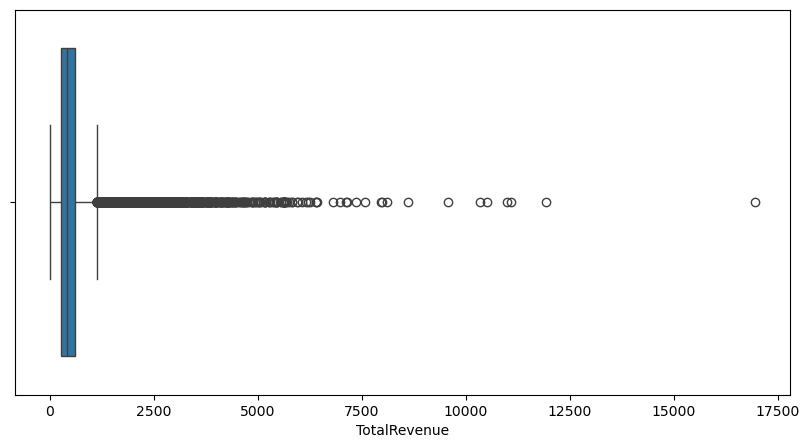

In [34]:
# check outliers in total revenue with a horizontal boxplot
plt.figure(figsize=(10,5))
sns.boxplot(customers['TotalRevenue'], orient='h')
plt.show()

In [35]:
# get the 99th percentile of TotalRevenue
percentile_99 = customers['TotalRevenue'].quantile(0.99)
print(f'Only 1% of customers spend more than {percentile_99:.2f}.')

Only 1% of customers spend more than 2343.49.


In [36]:
# How many values are above 10000

print(f'There are only {customers[customers["TotalRevenue"] > 10000].shape[0]} values above 10000 in TotalRevenue column, which represent {round(customers[customers["TotalRevenue"] > 10000].shape[0]/customers.shape[0]*100,2)}% of customers.')

There are only 6 values above 10000 in TotalRevenue column, which represent 0.01% of customers.


We will drop customers who have spent over 10.000, as they are considered outliers.

In [37]:
# Drop rows with TotalRevenue above 10000
customers = customers[customers['TotalRevenue'] <= 10000]

In [38]:
#Get quantile 0.33 and 0.66

quantile_33 = customers['TotalRevenue'].quantile(0.33)
quantile_66 = customers['TotalRevenue'].quantile(0.66)
print(f'The 33rd percentile is {quantile_33:.2f} and the 66th percentile is {quantile_66:.2f}.')

The 33rd percentile is 301.66 and the 66th percentile is 512.92.


## BookingsCheckedIn

We will have three groups:
People who used our services (bar, spa, etc) but didn't stay at the hotel (BookingsCheckedIn)=0 <br>
One time travellers BookingsCheckedIn=1 <br>
Recurrent travellers BookingsCheckedIn>1

In [39]:
# Check for custoemrs with BookingsCheckedIn=0
print(f'There are {customers[customers["BookingsCheckedIn"]==0].shape[0]} customers with BookingsCheckedIn=0, which is {customers[customers["BookingsCheckedIn"]==0].shape[0]/customers.shape[0]*100:.2f}% of the data.')

There are 0 customers with BookingsCheckedIn=0, which is 0.00% of the data.


In [40]:
# Check for duplicates in DocIDHash in the customers dataset that also have BookingsCheckedIn=0
print(f'There are {customers[customers["BookingsCheckedIn"]==0]["DocIDHash"].duplicated().sum()} duplicates in the DocIDHash column for customers with BookingsCheckedIn=0.')
print(f'There are {customers["DocIDHash"].duplicated().sum()} duplicates in the DocIDHash column.')

KeyError: 'DocIDHash'

### Features for demographic clustering

Objective: Identify customer groups based on who they are (age, nationality, loyalty, and spending habits).

Feature 1 groups (Age): Young(18-35), middle aged (36-55()) or old(over 56). <br>
Feature 2 groups (TotalRevenue): Very high spender(the top 10%) , High spender(from average spent(50%) to the top 10%), budget traveler (below average spent (lowest 50%)). <br>
Feature 3 groups (BookingsCheckedIn): one time stop(=1), infrequent(1-3), frequent (<3)  <br>
Feature 4 groups (PeoplePerRoom = PersonsNights/RoomNights): solo traveler(1), small group(2-5), big group (<5).

The goal of the project is to, with the variables available, make a new MarketSegmentation. Ideally an improved one, that goes more hand-in-hand with modern hospitality needs. The hotel is located in Lisbon, Portugal. 

The structure I would like to follow is:

1) Write a continuous text that introduces the current situation of the hospitality market in Lisbon, exploring needs for management in the industry.

2) With the variables available, and keeping in mind the features we have available, give me a new segmentation